In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [32]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [27]:
%%HTML
<h3> Question1</h3><br><font=3>Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your cod0e in the image.</font>

In [28]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [29]:
%%HTML
<h3>Question 2</h3><br>
<font=3>Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True</font>

In [33]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [53]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [54]:
%%HTML
<h3>Question 3</h3>
<font=3>Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.</font>

In [55]:
sr = df['floors'].value_counts().to_frame()
print(sr)

     floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8


In [56]:
%%HTML
<h3>Question 4</h3>
<br>
<font=3>Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers </font>

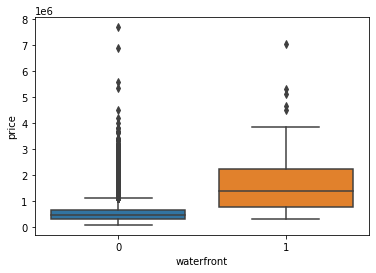

In [57]:
sns.boxplot(df['waterfront'],df['price'])

In [58]:
%%HTML
<h3>Question 5</h3>
<br>
<font=3>Use the function  regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.</font>

(0.0, 8081250.0)

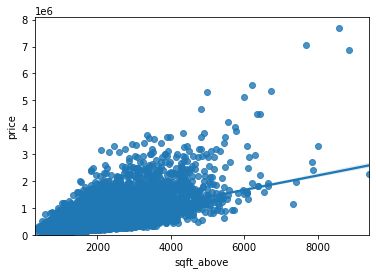

In [59]:
sns.regplot(x='sqft_above', y='price',data=df)
plt.ylim(0,)

In [60]:
%%HTML
<h3>Question 6</h3>
<br>
<font=3>Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.</font>

In [61]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

0.49285321790379316

In [62]:
%%HTML
<h3>Question 7</h3>
<br>
<font=3>Fit a linear regression model to predict the 'price' using the list of features:</font>

In [63]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X2 = df[features]
Y2 = df['price']
lm.fit(X2,Y2)
lm.score(X2,Y2)

0.6576526476975325

In [64]:
%%HTML
<h3>Question 8</h3>
<br>
<font=3>Use the list to create a pipeline object, predict the 'price', fit the object using the features in the list  features , then fit the model and calculate the R^2</font>

In [67]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X2,Y2)
pipe.score(X2,Y2)

0.7513378034740089

In [68]:
%%HTML
<h3>Question 9</h3>
<br>
<font=3>Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data. </font>

In [70]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features ]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371


In [71]:
Rig = Ridge(alpha=0.1)
Rig.fit(x_train,y_train)
Rig.score(x_test,y_test)

0.6478759163939115

In [72]:
%%HTML
<h3>Question 10</h3>
<br>
<font=3>Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.</font>

In [73]:
pf = PolynomialFeatures(degree=2)
x_train_pf = pf.fit_transform(x_train)
x_test_pf = pf.fit_transform(x_test)
rig = Ridge(alpha=0.1)
rig.fit(x_train_pf,y_train)
rig.score(x_test_pf,y_test)

0.7002744284038249